# 7. Segmentácia obrazu prahovaním

In [18]:
import numpy as np
from skimage import data, filters
import matplotlib.pyplot as plt

from skimage.morphology import disk

In [19]:
plt.rcParams['text.color'] = 'w'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['axes.labelcolor'] = 'w'

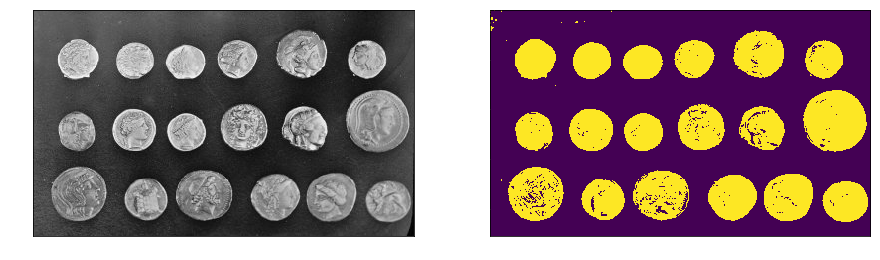

In [20]:
I = data.coins()
I = I[75:,:]
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(I,cmap='gray')
plt.subplot(122)
seg_I = I > 105
plt.imshow(seg_I)

Text(0, 0.5, 'Pixel count ')

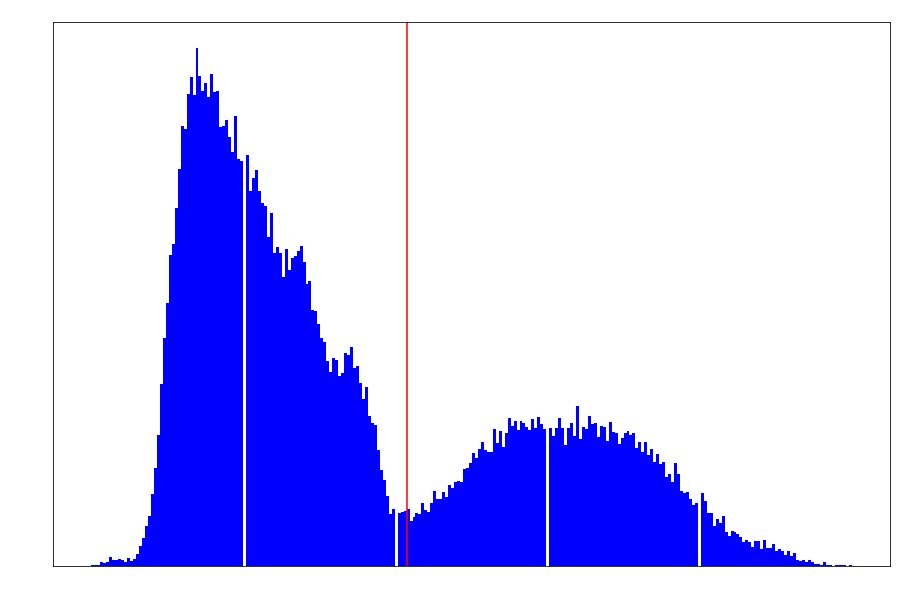

In [21]:
plt.figure(figsize=(15, 10))
ax1  = plt.subplot(111)
plt.hist(I.ravel(), bins=256, histtype='bar', color='blue')
ax1.axvline(105, color='r')

plt.title("Jasovy histogram")
plt.xlabel("Pixel intensity")
plt.ylabel("Pixel count ")

In [35]:
mean_object_intensity = np.mean(I[seg_I])
mean_background_intensity = np.mean(I[seg_I==0])

threshold = 120

In [36]:
counter = 0

while True:
    background  = I < threshold
    obj = I >= threshold

    mean_object_intensity = np.mean(I[obj])
    mean_background_intensity = np.mean(I[background])

    new_threshold = (mean_object_intensity + mean_background_intensity)/2
    #new_threshold = (mean_object_intensity*1.25 + mean_background_intensity*0.75)/2

    if np.abs(threshold - new_threshold) < 0.1:
        break
    counter = counter + 1
    threshold = new_threshold
print("Converged to optimal threshold in {} iteration with threshold: {}".format(counter,threshold))

Converged to optimal threshold in 3 iteration with threshold: 108.13560341311842


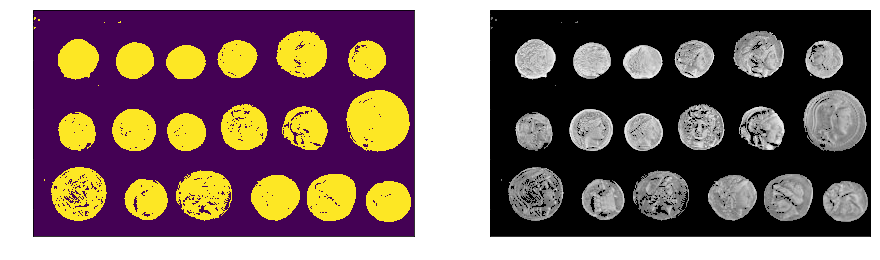

In [24]:
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(I>threshold)
plt.subplot(122)
plt.imshow(I * (I>threshold),cmap='gray')

## Nerovnormerne osvetlenie

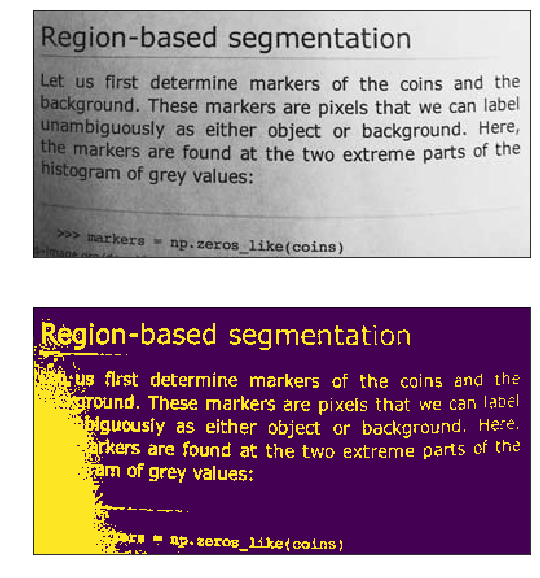

In [37]:
I2 = data.page()
plt.figure(figsize=(15, 10))
plt.subplot(211)
plt.imshow(I2,cmap='gray')
plt.subplot(212)
plt.imshow(I2<120)

## Ukazka co ponuka skimage

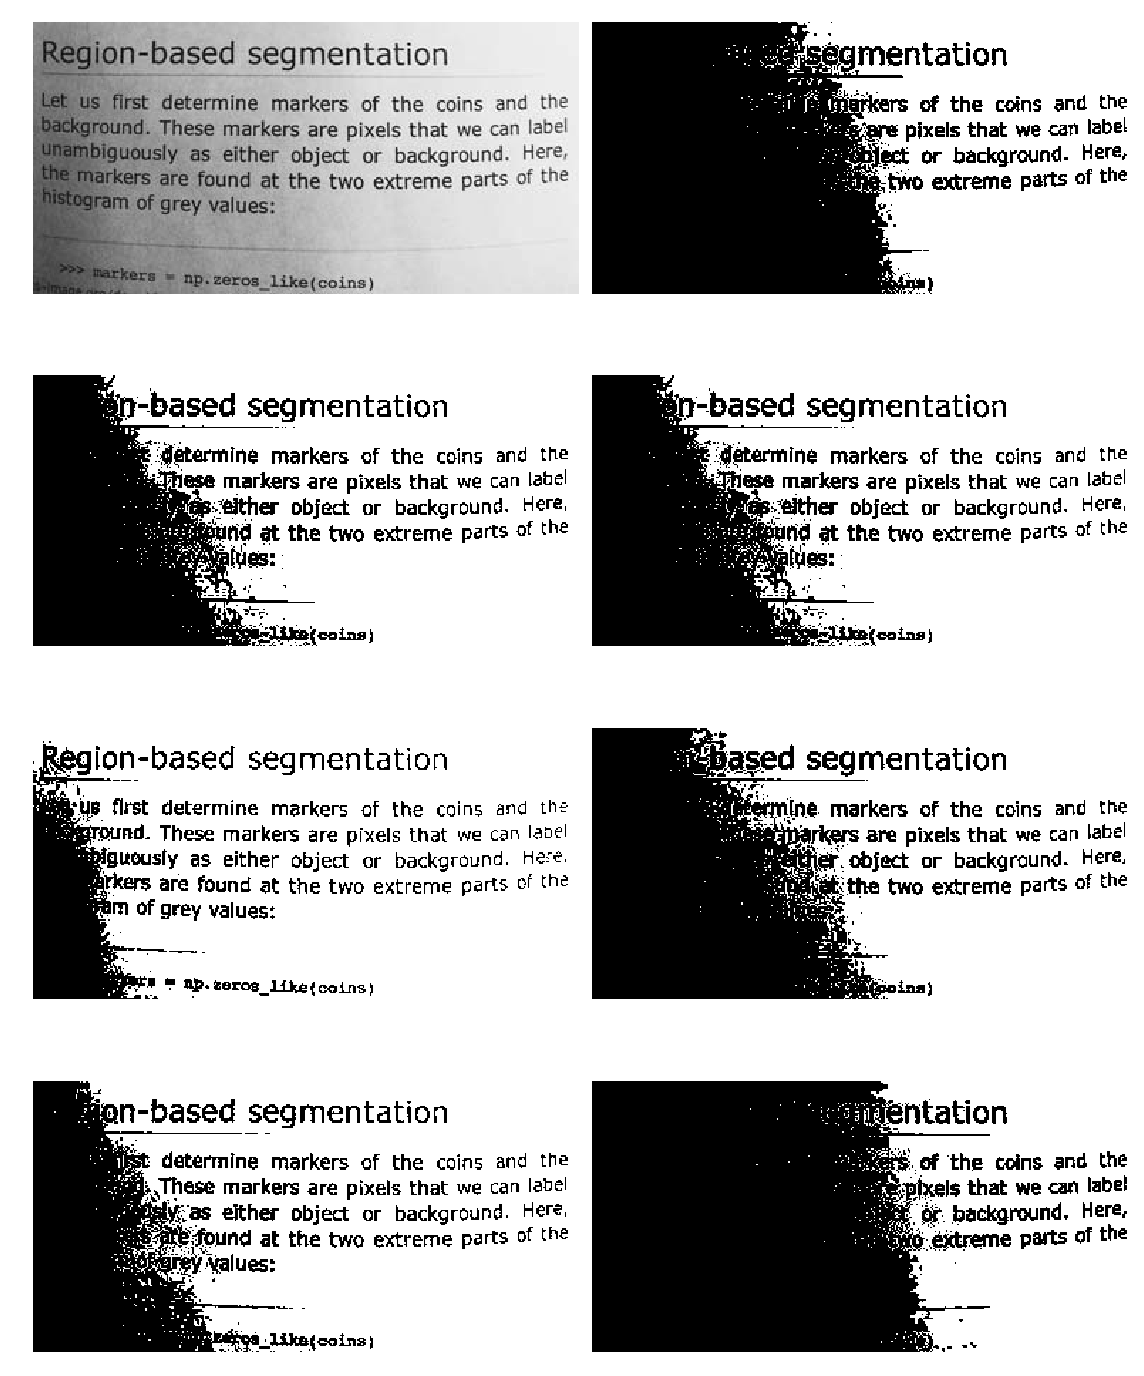

In [26]:
fig, ax = filters.try_all_threshold(I2, figsize=(16, 20), verbose=False)
plt.show()

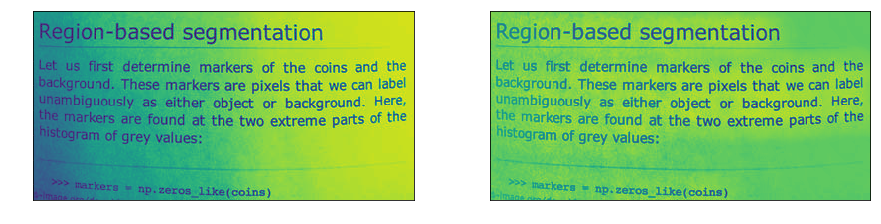

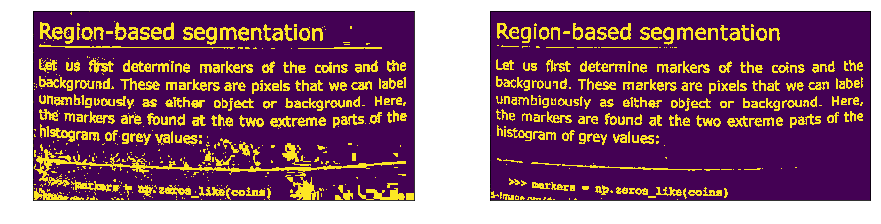

In [42]:
s_elem = disk(20)

I2_float = I2/255
I_filt  = filters.rank.mean(I2_float,selem=s_elem)/255
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(I2_float)
plt.subplot(122)
plt.imshow((I2_float -I_filt))
im_t1 = (I2_float - I_filt) < 0.0
im_t2 = (I2_float - I_filt) < -0.05
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(im_t1)
plt.subplot(122)
plt.imshow(im_t2)

Text(0.5, 1.0, 'B')

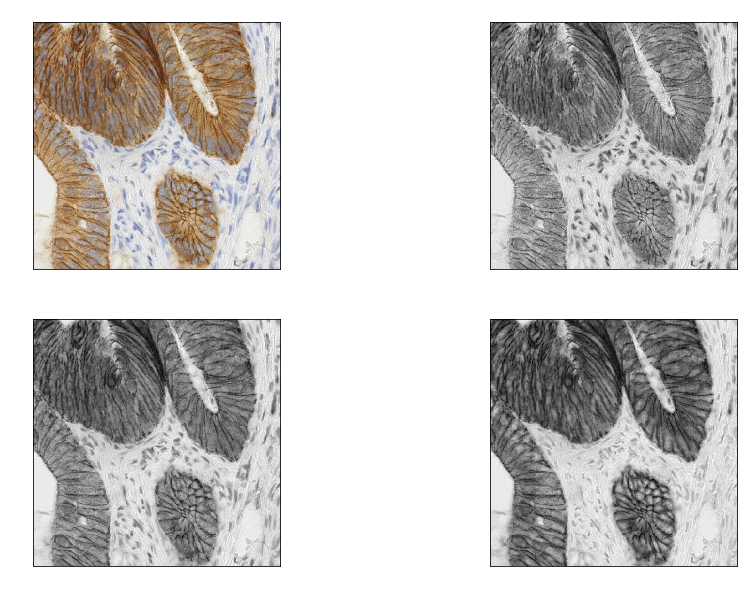

In [28]:
I3 =data.immunohistochemistry()

plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.imshow(I3)
plt.subplot(222)
plt.imshow(I3[:,:,0],cmap='gray')
plt.title('R')
plt.subplot(223)
plt.imshow(I3[:,:,1],cmap='gray')
plt.title('G')
plt.subplot(224)
plt.imshow(I3[:,:,2],cmap='gray')
plt.title('B')

Text(0.5, 1.0, 'Result mask')

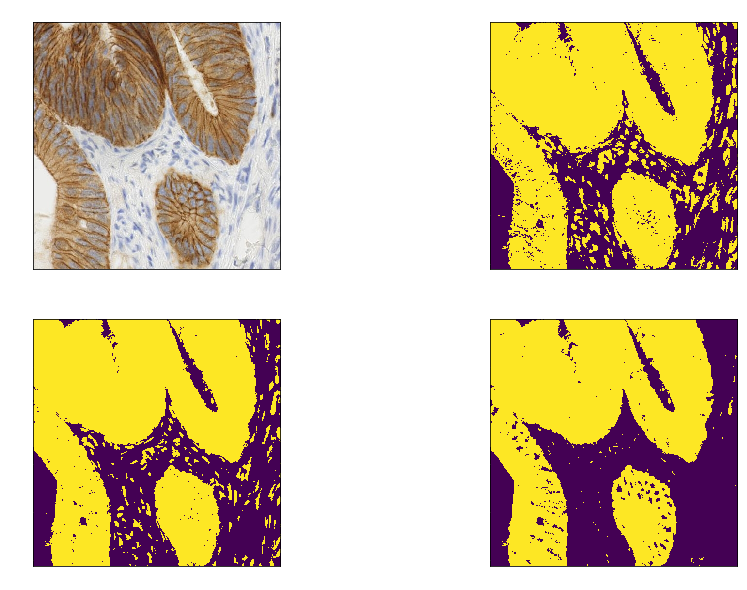

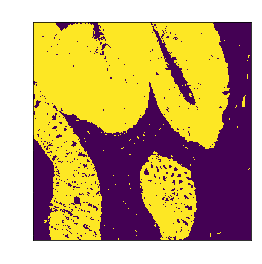

In [47]:
plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.imshow(I3)

plt.subplot(222)
t_R =I3[:,:,0]<200
plt.imshow(t_R)
plt.title('R')

plt.subplot(223)
t_G = I3[:,:,1]<185
plt.imshow(t_G)
plt.title('G')

plt.subplot(224)
t_B = I3[:,:,2]<160
plt.imshow(t_B)
plt.title('B')


plt.figure()
mask = np.logical_and(np.logical_and(t_R,t_G),t_B)
plt.imshow(mask)
plt.title('Result mask')

#  The CIELAB color space
(also known as CIE L*a*b* or sometimes incorrectly abbreviated as simply "Lab" color space) is a color space defined by the International Commission on Illumination (CIE) in 1976. It expresses color as three values: L* for the lightness from black (0) to white (100), a* from green (−) to red (+), and b* from blue (−) to yellow (+). CIELAB was designed so that the same amount of numerical change in these values corresponds to roughly the same amount of visually perceived change.

Text(0.5, 1.0, 'b')

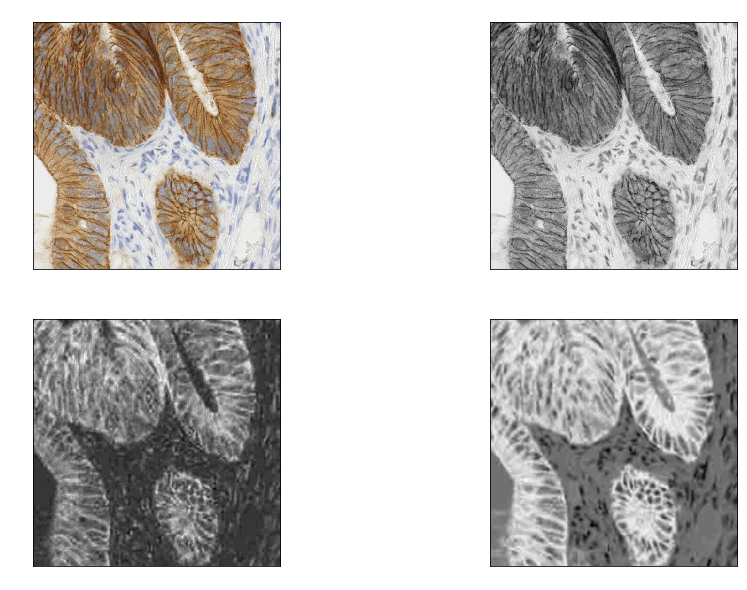

In [30]:
from skimage import color
I3_lab = color.rgb2lab(I3)
plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.imshow(I3)
plt.subplot(222)
plt.imshow(I3_lab[:,:,0],cmap='gray')
plt.title('L')
plt.subplot(223)
plt.imshow(I3_lab[:,:,1],cmap='gray')
plt.title('a')
plt.subplot(224)
plt.imshow(I3_lab[:,:,2],cmap='gray')
plt.title('b')

# D.U odsegmentovat obrazok v CIELAbe a dokoncit cvicenie podla knihy